## 3장 신경망 시작하기
### 3.1 신경망의 구조

#### 3.1.0 신경망 훈련과 연관 된것 
- 네트워크(또는 모델)를 구성하는 층
- 입력 데이터와 그에 상응하는 타깃
- 학습에 사용할 피드백 선호를 정의하는 손실 함수
- 학습 진행 방식을 결정하는 옵티마이저

#### 3.1.1 층: 딥러닝의 구성 단위
- 2D 텐서 : 간단한 벡터 데이터 저장, 밀집연결층(densely connected layer)에 의해 처리
- 3D 텐서 : 시퀀스 데이터 저장, LSTM 같은 순환 층에 의해 처리 
- 4D 텐서 :  이미지 데이터 저장, 2D 합성곱 층( convolution layer)에 의해 처리 


In [ ]:
# 첫번째 차원이 784인 2D 텐서만 입력으로 받는 층 -> 첫번째 차원의 크기가 32로 변환된 텐서를 출력할 것

from keras import layers
layers = layers.Dense(32,input_shape=(784,)) # 32개의 유닛으로 된 밀집 층

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(10))

# 두번째층에는 input_shape 매개변수를 지정하지 않았지만 앞선 층의 출력 크기를 입력 크기로 자동으로 채택해준다.



#### 3.1.2 모델: 층의 네트워크
- 가지(branch)가 2개인 네트워크 
- 출력이 여러 개인 네트워크
- 인셉션(Inception) 블록 
 
 딱맞는 네트워크 찾기는 어려움

#### 3.1.3 손실 함수와 옵티마이저: 학습 과정을 조절하는 열쇠 

- 손실 함수(loss function)(목적 함수(objective function)) : 훈련하는 동안 최소화될 값입니다. 주어진 문제에 대한 성공 지표가 됩니다.

- 옵티마이저(optimizer) : 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정합니다.
 특정 종류의 확률적 경사 하강법(SGD)을 구현 

### 3.2 케라스 소개 
#### 3.2.2 케라스를 사용한 개발

1. 입력텐서와 타깃 텐서로 이루어진 훈련 데이터를 정의합니다.
2. 입력과 타깃을 매핑하는 층으로 이루어잔 네트워크(또는 모델)를 정의 
3. 손실 함수, 옵티마이저, 모니터링하기 위한 측정 지표를 선택하여 학습 과정을 설정
4. 훈련 데이터에 대해 모델의 fit() 메서드를 반복적으로 호출 한다.




In [ ]:
from keras import models 
from keras import layers

# Sequential 사용
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))

# 함수형 API 사용
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10,activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)


In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])


### 3.4 영화 리뷰 분류: 이진 분류 예제
#### 3.4.1 IMDB 데이터셋
- IMDB 데이터셋 로드하기

In [ ]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])


9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 3.4.3 신경망 모델 만들기
- Dense 층을 쌓을 때 두 가지 중요한 구조상의 결정이 필요함 
- 얼마나 많은 층을 사용할 것인가?
- 각층에 


In [ ]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#### 활성화 함수가 무엇인가? 왜 필요한가?

relu는 활성화 함수 
활성화 함수 없이 한다면 DEnse 층은 선형적인 연산인 점곱과 덧셈 2개로 구성됩니다.
output = dot(w,input)+b
- 가설 공간이 확장x 

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

#### 손실함수
##### MSE(Mean Squared Error), 평균 제곱 오차

##### CEE(Cross Entropy Error),교차 엔트로피 오차

In [ ]:
from keras import losses
from keras import metrics


model.compile(optimizer=optimizers.RMSprop(lr=0.001),
               loss=losses.binary_crossentropy,
               metrics=[metrics.binary_accuracy])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 50ms/step - loss: 0.5157 - acc: 0.7937 - val_loss: 0.4048 - val_acc: 0.8477
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3102 - acc: 0.9037 - val_loss: 0.3179 - val_acc: 0.8794
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2284 - acc: 0.9267 - val_loss: 0.2776 - val_acc: 0.8926
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1782 - acc: 0.9449 - val_loss: 0.3249 - val_acc: 0.8695
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1489 - acc: 0.9525 - val_loss: 0.2908 - val_acc: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1210 - acc: 0.9641 - val_loss: 0.2929 - val_acc: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1017 - acc: 0.9708 - val_loss: 0.3116 - val_acc: 0.8838
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0842 - a

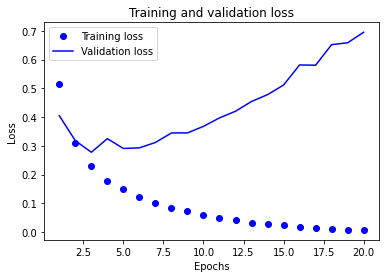

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

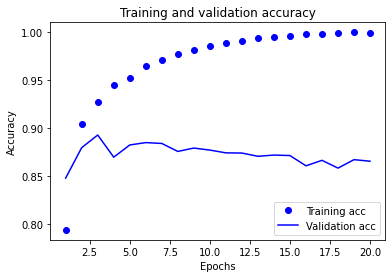

In [ ]:
plt.clf() # 그래프를 초기화합니다.
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.4953 - accuracy: 0.8135
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2853 - accuracy: 0.9036
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2131 - accuracy: 0.9240
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2882 - accuracy: 0.8844


In [ ]:
print(results)

[0.288154661655426, 0.8844000101089478]


In [ ]:
model.predict(x_test)

array([[0.16920659],
       [0.9997935 ],
       [0.7545532 ],
       ...,
       [0.0930025 ],
       [0.07432482],
       [0.48155293]], dtype=float32)

In [ ]:
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]


### 3.5.1 로이터 데이터셋
- 46개의 토픽이 있음 
- 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있음

In [ ]:
 from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
     num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
 len(train_data),len(test_data)

(8982, 2246)

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]]) 
#0, 1, 2는 ‘패딩’, ‘문서 시작’, ‘사전에 없음’을 위한 인덱스이므로 3을 뺍니다.

557056/550378 [==============================] - 0s 0us/step


In [ ]:
# 샘플에 연결된 레이블은 토픽의 인덱스로 0과 45 사이의 정수
train_labels[10]

3

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 3.5.3 모델 구성
- 영화 리뷰 분류 문제와 비슷해 보임
    - 짧은 텍스트를 분류
- 출력 클래스의 개수가 2에서 46개로 늘어남    

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

- 마지막 Dense 층의 크기가 46입니다. 
-마지막 층에 softmax 활성화 함수가 사용
- 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력
    - 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률입니다. 46개의 값을 모두 더하면 1이 됩니다.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 3.5.4 훈련 검증
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 2.5179 - accuracy: 0.5296 - val_loss: 1.6940 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 1.3926 - accuracy: 0.7061 - val_loss: 1.3091 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 54ms/step - loss: 1.0437 - accuracy: 0.7740 - val_loss: 1.1390 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 55ms/step - loss: 0.8154 - accuracy: 0.8207 - val_loss: 1.0479 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 1s 54ms/step - loss: 0.6472 - accuracy: 0.8597 - val_loss: 0.9852 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 1s 56ms/step - loss: 0.5215 - accuracy: 0.8899 - val_loss: 0.9419 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 54ms/step - loss: 0.4161 - accuracy: 0.9132 - val_loss: 0.9214 - val_accuracy: 0.8010
Epoch 8/20
16

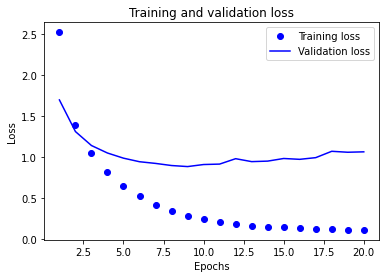

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

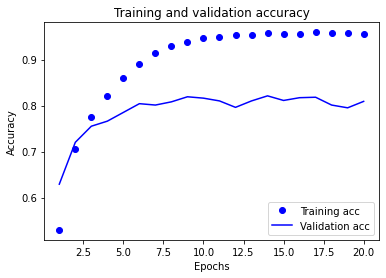

In [ ]:
plt.clf() # 그래프를 초기화합니다.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=13,    # 과적합이 13번째부터 생김 
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/13
16/16 [==============================] - 1s 63ms/step - loss: 2.6555 - accuracy: 0.5362 - val_loss: 1.7261 - val_accuracy: 0.6530
Epoch 2/13
16/16 [==============================] - 1s 53ms/step - loss: 1.4088 - accuracy: 0.7073 - val_loss: 1.2754 - val_accuracy: 0.7210
Epoch 3/13
16/16 [==============================] - 1s 53ms/step - loss: 1.0372 - accuracy: 0.7757 - val_loss: 1.1104 - val_accuracy: 0.7460
Epoch 4/13
16/16 [==============================] - 1s 53ms/step - loss: 0.8123 - accuracy: 0.8264 - val_loss: 1.0137 - val_accuracy: 0.7810
Epoch 5/13
16/16 [==============================] - 1s 53ms/step - loss: 0.6473 - accuracy: 0.8647 - val_loss: 0.9560 - val_accuracy: 0.7840
Epoch 6/13
16/16 [==============================] - 1s 54ms/step - loss: 0.5159 - accuracy: 0.8959 - val_loss: 0.9056 - val_accuracy: 0.8130
Epoch 7/13
16/16 [==============================] - 1s 52ms/step - loss: 0.4140 - accuracy: 0.9131 - val_loss: 0.8853 - val_accuracy: 0.8050
Epoch 8/13
16

In [ ]:
results

[1.1524485349655151, 0.7733749151229858]

### 3.5.5 새로운 데이터에 대해 예측하기
- 모델 인스턴스의 predict 메서드는 46개의 토픽에 대한 확률 분포를 반환

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

### 3.5.6 레이블과 손실을 다루는 다른 방법

In [ ]:
#정수 텐서로 변환
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
# 정수 레이블을 사용할 때는 sparse_categorical_crossentropy를 사용
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3.5.7 충분히 큰 중간층을 두어야 하는 이유


-. 46차원보다 훨씬 작은 중간층(예를 들어 4차원)을 두면 정보의 병목이 어떻게 나타남?검증 정확도의 최고 값은 약 71%로 8% 정도 감소되었습니다. 이런 손실의 원인 대부분은 많은 정보(클래스 46개의 분할 초평면을 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문입니다. 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했습니다.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 17ms/step - loss: 3.3925 - accuracy: 0.0738 - val_loss: 3.0031 - val_accuracy: 0.0950
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 2.3823 - accuracy: 0.3941 - val_loss: 1.8454 - val_accuracy: 0.6420
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.4277 - accuracy: 0.6787 - val_loss: 1.4107 - val_accuracy: 0.6780
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.1509 - accuracy: 0.7144 - val_loss: 1.3497 - val_accuracy: 0.6710
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0207 - accuracy: 0.7368 - val_loss: 1.3039 - val_accuracy: 0.7030
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 0.9206 - accuracy: 0.7682 - val_loss: 1.3151 - val_accuracy: 0.6980
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.8390 - accuracy: 0.7917 - val_loss: 1.2982 - val_accuracy: 0.7110
Epoch 8/20
63

In [ ]:
results

[1.1524485349655151, 0.7733749151229858]